In [1]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [2]:
basedir = os.path.abspath(os.path.dirname(os.path.realpath('__file__')))
IMG_SIZE = 300

In [3]:
avg_height, min_height, max_height = [], [], []
avg_width, min_width, max_width = [], [], []
name = []

def get_size_statistics(x):
    DIR = os.path.join(basedir, x)
    for directory in os.listdir(DIR):
        DIR_now = os.path.join(DIR, directory)
        heights = []
        widths = []
        img_count = 0
        name.append(directory)
        for img in os.listdir(DIR_now):
            path = os.path.join(DIR_now, img)
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
        avg_height.append(sum(heights) / len(heights))
        avg_width.append(sum(widths) / len(widths))
        max_height.append(max(heights))
        min_height.append(min(heights))
        max_width.append(max(widths))
        min_width.append(min(widths))

get_size_statistics("data")

C:\Users\akteotonio\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [4]:
def plot_analysis(list1, color1, list2, color2, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ind = np.arange(14)                
    width = 0.35
    
    rects1 = ax.bar(ind, list1, width,
                        color=color1,
                        error_kw=dict(elinewidth=6,ecolor='pink'))

    rects2 = ax.bar(ind+width, list2, width,
                        color=color2,
                        error_kw=dict(elinewidth=6,ecolor='orange'))


    ax.set_ylabel('Scores')
    ax.set_title(title)
    xTickMarks = name
    ax.set_xticks(ind+width)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, rotation=90, fontsize=10)

    ax.legend( (rects1[0], rects2[0]), ('Altura', 'Largura') )
    
    plt.show()

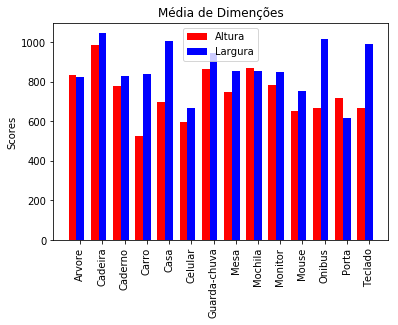

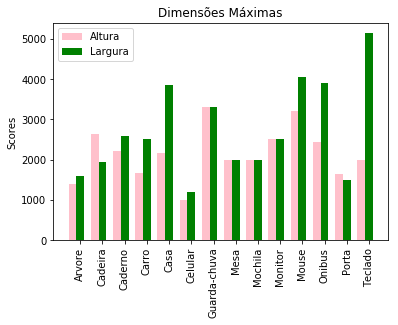

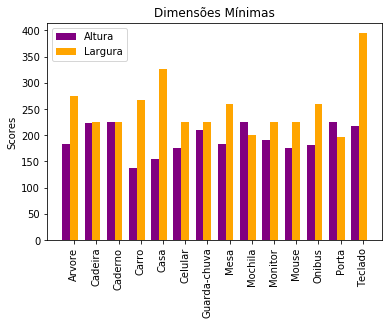

In [5]:
plot_analysis(avg_height, 'red', avg_width, 'blue', 'Média de Dimenções')
plot_analysis(max_height, 'pink', max_width, 'green', 'Dimensões Máximas')
plot_analysis(min_height, 'purple', min_width, 'orange', 'Dimensões Mínimas')

In [6]:
objetos = {"Arvore": 0, 
                "Cadeira": 1,
                "Caderno": 2,
                "Carro": 3, 
                "Casa": 4,
                "Celular": 5,
                "Guarda-chuva": 6,
                "Mesa": 7,
                "Mochila": 8,
                "Monitor": 9,
                "Mouse": 10,
                "Onibus": 11,
                "Porta": 12,
                "Teclado": 13}

def label_img(name):
    array = [0]*14
    array[objetos[name]] = 1
    return np.array(array)

In [7]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

def rotation_images_dataset():
    if not os.path.exists(os.path.join(basedir, "train")):
            os.mkdir(os.path.join(basedir, "train"))
    DIR = os.path.join(basedir, "data")
    for directory in os.listdir(DIR):
        DIR_now = os.path.join(DIR, directory)
        DIR_train = os.path.join(basedir, "train", directory)
        if not os.path.exists(DIR_train):
            os.mkdir(DIR_train)
        for img in os.listdir(DIR_now):
            label = label_img(directory)
            path = os.path.join(DIR_now, img)
            image = load_img(path)  # this is a PIL image
            x = img_to_array(image)  # this is a Numpy array with shape (3, 150, 150)
            x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=DIR_train, save_prefix=img, save_format='jpeg'):
                i += 1
                if i > 10:
                    break  # otherwise the generator would loop indefinitely
            
#rotation_images_dataset()

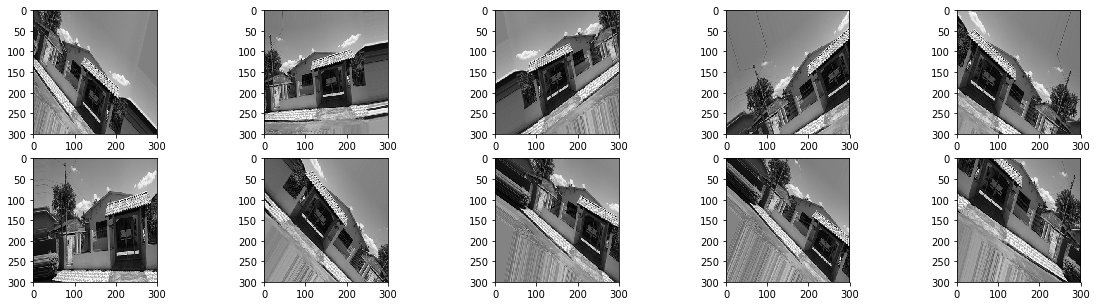

In [8]:
def show_rotation():
    DIR_now = os.path.join(basedir, 'train', "Casa")
    images = []
    i = 0
    for img in os.listdir(DIR_now):
        if i < 10:
            label = label_img("Casa")
            path = os.path.join(DIR_now, img)
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            images.append(np.array(img))
            i+=1
    w=10
    h=10
    fig=plt.figure(figsize=(20, 5))
    columns = 5
    rows = 2
    for i, image in enumerate(images):
        img = np.random.randint(10, size=(h,w))
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(image, cmap = 'gist_gray')
            
show_rotation()

In [9]:
def load_training_data():
    DIR = os.path.join(basedir, "train")
    train_data = []
    for directory in os.listdir(DIR):
        DIR_now = os.path.join(DIR, directory)
        for img in os.listdir(DIR_now):
            label = label_img(directory)
            path = os.path.join(DIR_now, img)
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
    shuffle(train_data)
    return train_data

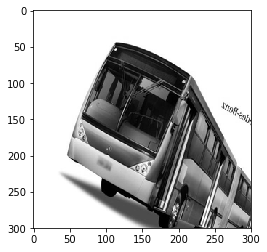

In [10]:
train_data = load_training_data()
plt.imshow(train_data[43][0], cmap = 'gist_gray')

In [11]:
len(train_data)

7950

In [12]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [13]:
trainImages.shape

(7950, 300, 300, 1)

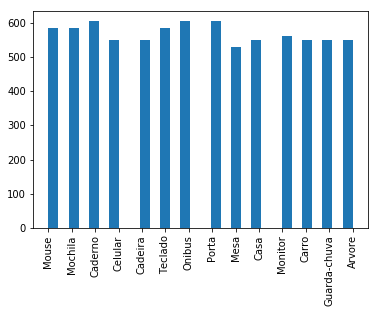

In [14]:
images = [name[np.argmax(i)] for i in trainLabels]

plt.hist(images, bins=30)
plt.xticks(rotation='vertical')
plt.show()

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(trainImages, trainLabels, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5326, 300, 300, 1) (5326, 14)
(2624, 300, 300, 1) (2624, 14)


In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(14, activation = 'softmax'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [18]:
try:
    model = models.load_model('images_classifier.h5')
except:
    history = model.fit(X_train, Y_train, batch_size = 50, epochs = 5, verbose = 1)
    model.save('images_classifier.h5')

Epoch 1/5
5326/5326 [==============================] - 1679s 315ms/step - loss: 0.2088 - acc: 0.9322
Epoch 2/5
5326/5326 [==============================] - 1552s 291ms/step - loss: 0.1487 - acc: 0.9459
Epoch 3/5
5326/5326 [==============================] - 1572s 295ms/step - loss: 0.1174 - acc: 0.9552
Epoch 4/5
5326/5326 [==============================] - 1625s 305ms/step - loss: 0.1027 - acc: 0.9604
Epoch 5/5
5326/5326 [==============================] - 1699s 319ms/step - loss: 0.0831 - acc: 0.9681


In [19]:
loss, score = model.evaluate(X_test, Y_test, verbose = 0)

In [20]:
print(score)

0.9450675336326041


In [21]:
def plt_history(name, color, index):
    plt.figure()
    plt.title('Model '+name)
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.plot(history.epoch, np.array(history.history[index]), color=color)

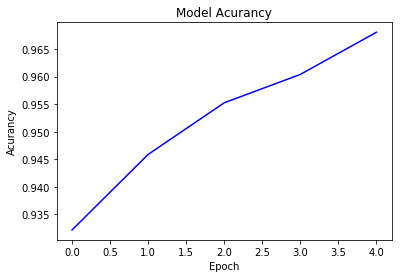

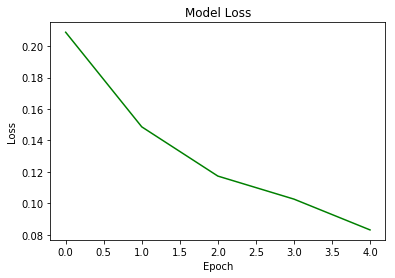

In [22]:
plt_history("Acurancy", "blue", "acc")
plt_history("Loss", "green", "loss")

In [23]:
predicted = model.predict(X_test)
array = [0]*14
predict = list()
test_labels = list()

In [24]:
for value in predicted:
    predict.append(np.argmax(value))
for value in Y_test:
    test_labels.append(np.argmax(value))

[[178   2   0   1   1   1   0   0   1   0   1   0   0   0]
 [  0 152   4   0   0   0   0   9   0   0   0   0   1   0]
 [  0   3 102   1   2   3  13   2  53  13   0   3   8   0]
 [  0  10   0  94   2   1   4   8  48  10   8  13   0   0]
 [  0  11   8   6 113   0   0   0  20   5   4   3   7   0]
 [  0  36   1   3   0  31  22   3  66   6   4   1   2   1]
 [  0  17   3   0   0   0 153   8   0   0   3   0   1   0]
 [  0  46   0   0   0   0   2 125   0   0   0   0   0   0]
 [  0   6   4   1   0   0   6   0 156   9   2   1   4   0]
 [  0   0   9   0   0   0  26   0  14 150   0   0   0   0]
 [  0   8   8   1   0   3  56   7  61   6  34   0   1   0]
 [  0   6   2  34   4   2   4   4  32  11   4 103   0   0]
 [  0  87  10   0   0   0  14   9  19   0   1   0  48   0]
 [  0   6   0   4   1   1  16   0  20   1  15   9   1 120]]


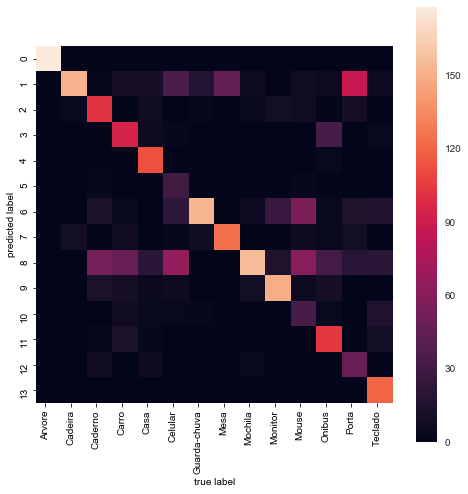

In [25]:
%matplotlib inline
mat = confusion_matrix(test_labels, predict)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

sns.set()
sns.heatmap(mat.T, square=True,
            annot=True,
            xticklabels=np.unique(test_labels),
            yticklabels=np.unique(test_labels))
# annot=True,
ind = np.arange(14)                
width = 0.35

plt.xlabel('true label')
plt.ylabel('predicted label')
xTickMarks = name
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)

# plt.savefig(os.path.join('.', 'outputs', 'confusion_matrix.png'))
print(mat)
plt.show()